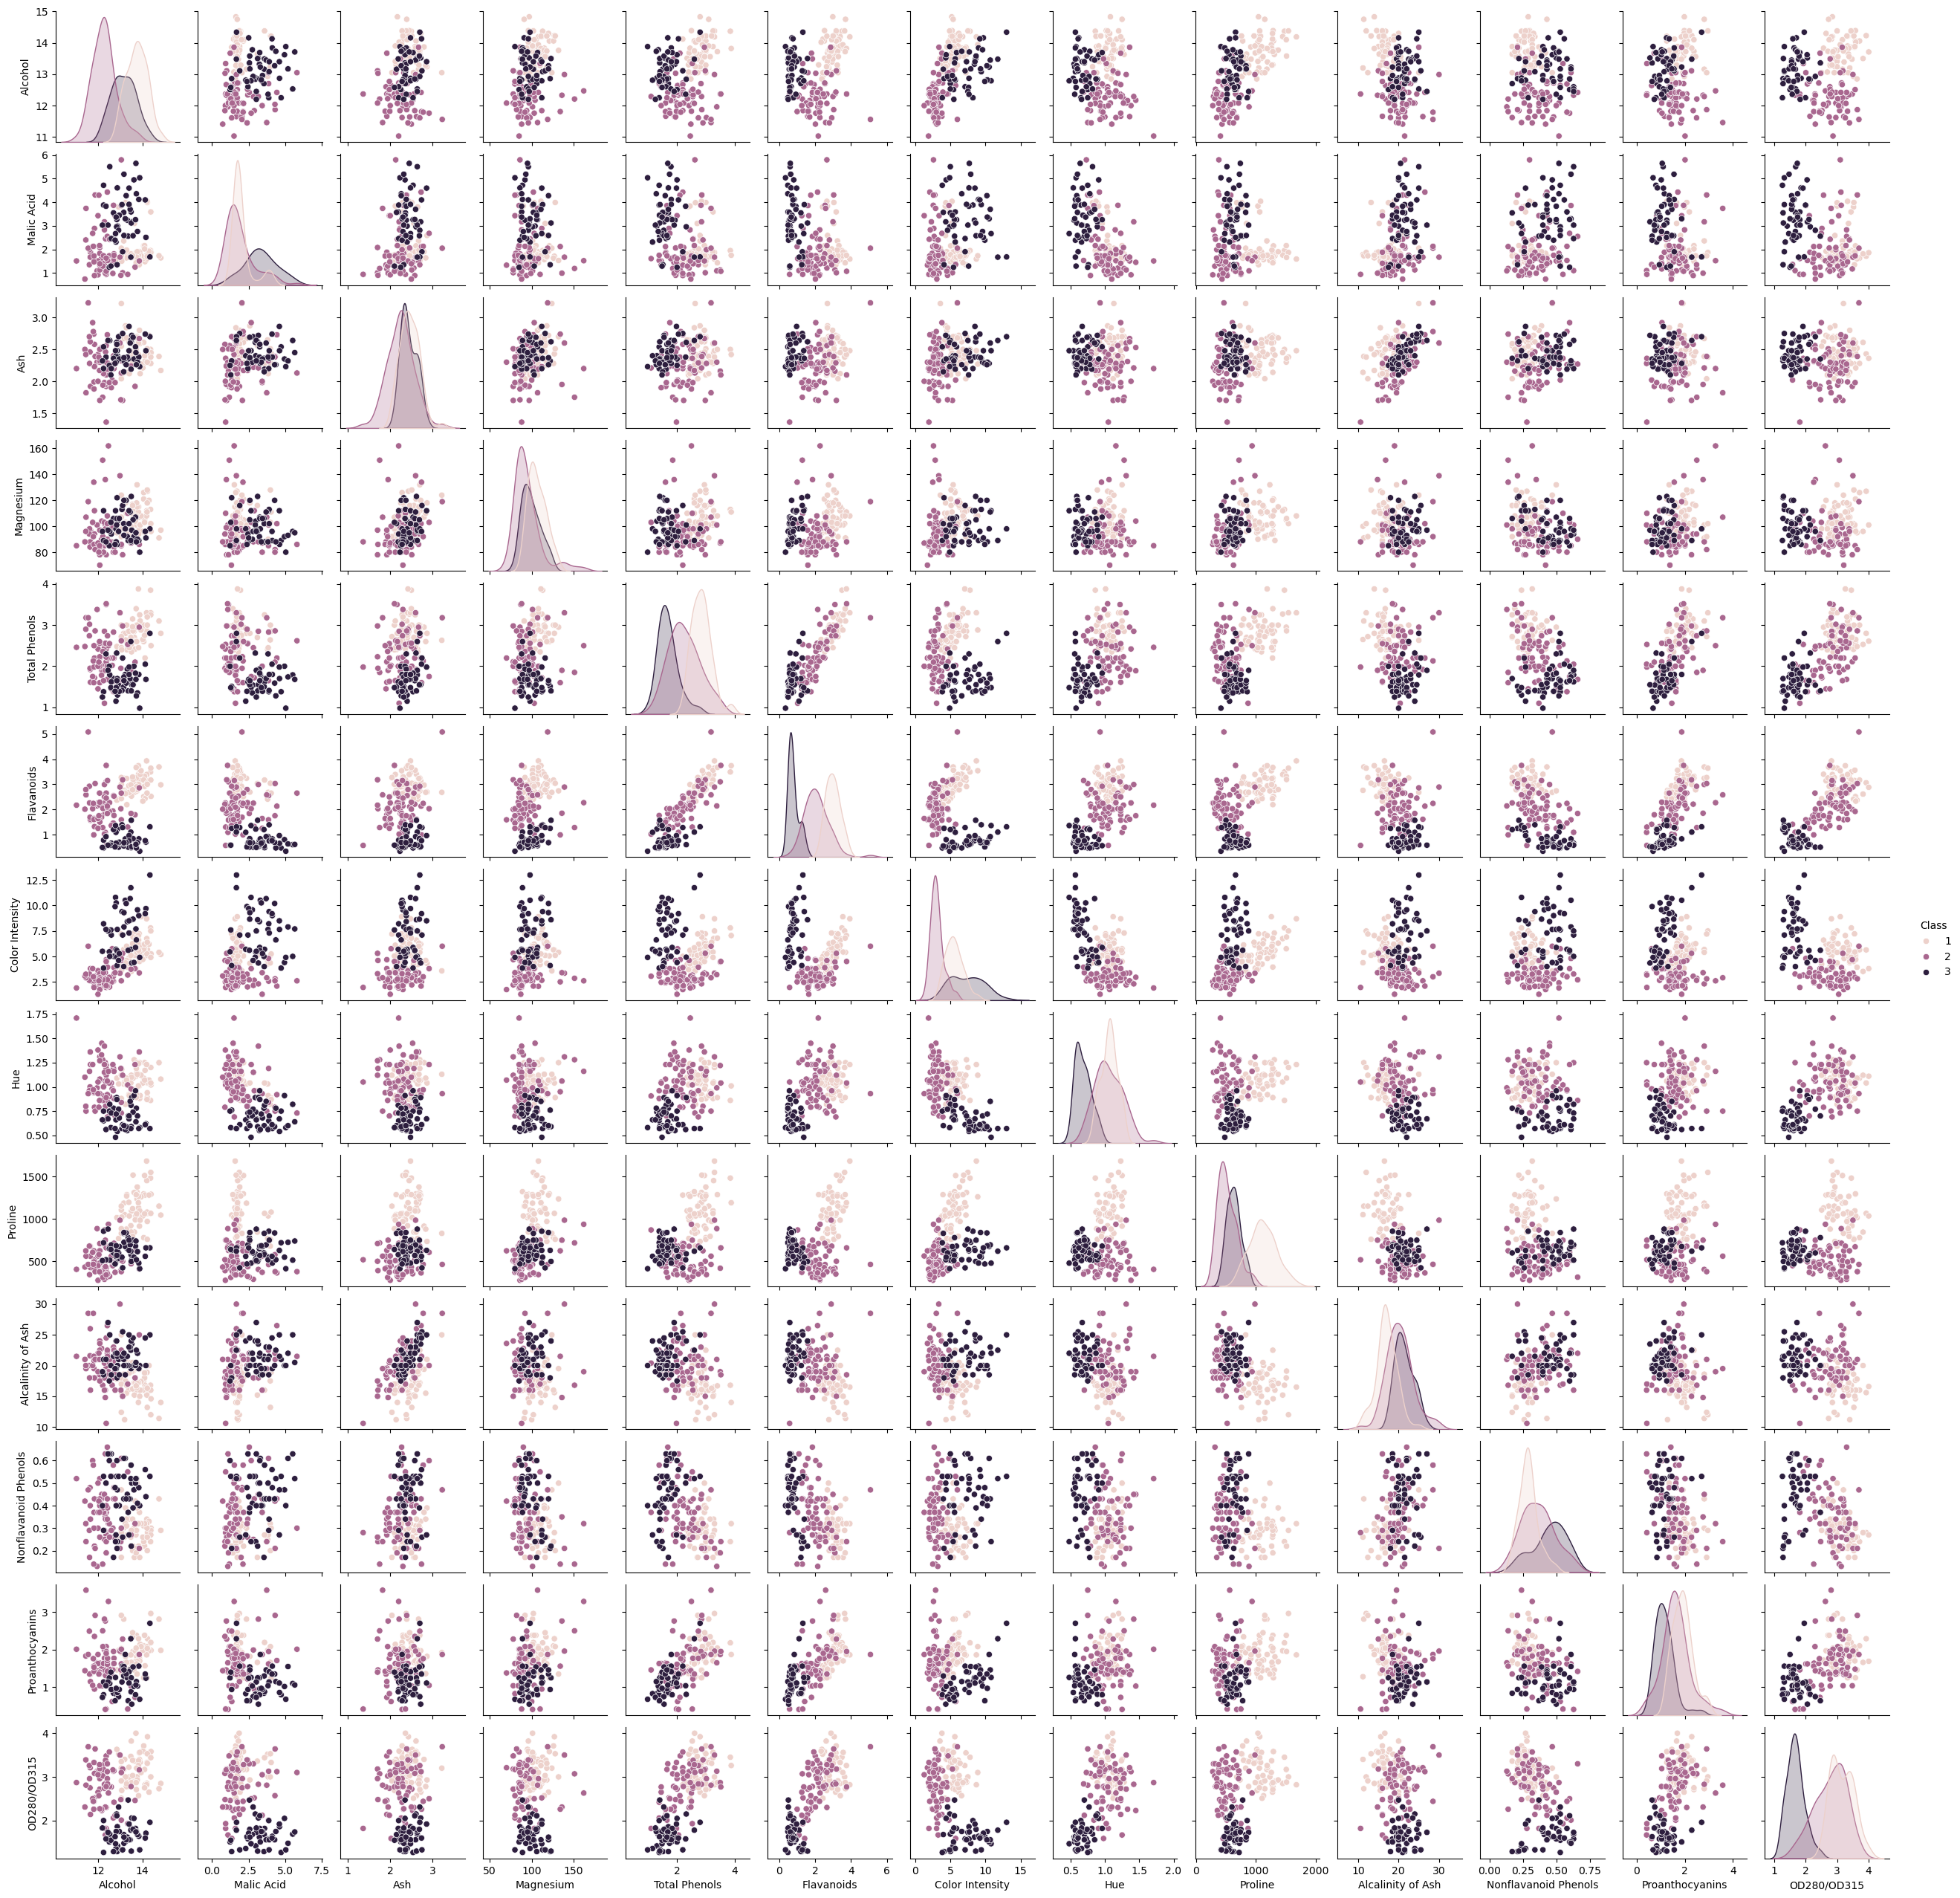


Using euclidean distance:
k=1, Accuracy: 0.9722
[[12  0  0]
 [ 1 13  0]
 [ 0  0 10]]
              precision    recall  f1-score   support

           1       0.92      1.00      0.96        12
           2       1.00      0.93      0.96        14
           3       1.00      1.00      1.00        10

    accuracy                           0.97        36
   macro avg       0.97      0.98      0.97        36
weighted avg       0.97      0.97      0.97        36

k=3, Accuracy: 0.9722
[[12  0  0]
 [ 1 13  0]
 [ 0  0 10]]
              precision    recall  f1-score   support

           1       0.92      1.00      0.96        12
           2       1.00      0.93      0.96        14
           3       1.00      1.00      1.00        10

    accuracy                           0.97        36
   macro avg       0.97      0.98      0.97        36
weighted avg       0.97      0.97      0.97        36

k=5, Accuracy: 0.9722
[[12  0  0]
 [ 0 13  1]
 [ 0  0 10]]
              precision    recall 

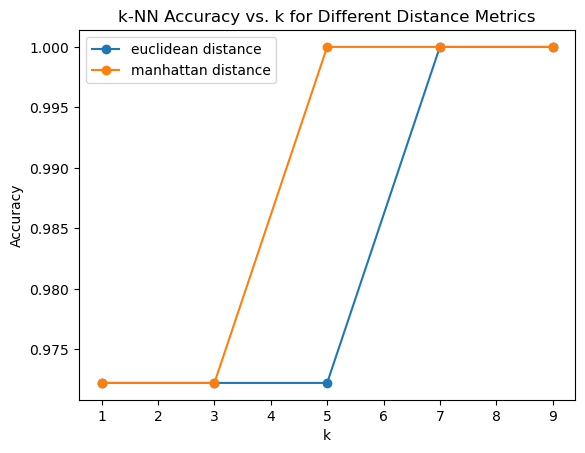

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report

from untitled0 import KNN

%matplotlib inline
 
# Loading the dataset
column_names = ["Class", "Alcohol", "Malic Acid", "Ash", "Alcalinity of Ash", "Magnesium", 
                "Total Phenols", "Flavanoids", "Nonflavanoid Phenols", "Proanthocyanins", 
                "Color Intensity", "Hue", "OD280/OD315", "Proline"]

df = pd.read_csv(r"C:\Users\mehme\OneDrive\Desktop\wine.data", header=None, names=column_names)

# Visualizing features for different classes
sns.pairplot(df, hue="Class", vars=["Alcohol", "Malic Acid", "Ash", "Magnesium", "Total Phenols", 
                                     "Flavanoids", "Color Intensity", "Hue", "Proline", 
                                     "Alcalinity of Ash", "Nonflavanoid Phenols", "Proanthocyanins", "OD280/OD315"], height=2)
plt.show()

# Splitting features and target
X = df.drop(columns=["Class"])
y = df["Class"]

# StandardScaler function is for normalizing features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# train_test_split is for splitting data into training (80%) and testing (20%) parts
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)

# In order to evaluate k-NN for different k values
k_values = [1, 3, 5, 7, 9]
metrics = ["euclidean", "manhattan"]

for metric in metrics:
    accuracies = []
    print(f"\nUsing {metric} distance:")
    for k in k_values:
        knn = KNN(k=k, metric=metric)
        knn.fit(X_train, y_train)
        y_pred = knn.predict(X_test)
        acc = knn.accuracy(y_test, y_pred)
        accuracies.append(acc)
        print(f"k={k}, Accuracy: {acc:.4f}")
        print(confusion_matrix(y_test, y_pred))
        print(classification_report(y_test, y_pred))
    
    # To plot Accuracy vs k
    plt.plot(k_values, accuracies, marker='o', label=f"{metric} distance")

plt.xlabel("k")
plt.ylabel("Accuracy")
plt.title("k-NN Accuracy vs. k for Different Distance Metrics")
plt.legend()
plt.show()
